<a href="https://colab.research.google.com/github/metehanunal0/ML-NN-Classification/blob/main/NNClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification

In [ ]:
# load modules
import numpy as np
import pandas as pd
np.random.seed(1)
# get data
#test  = pd.read_csv('test.csv')
train = pd.read_csv('NNClassificationTrain.csv')

# Data Visualization

In [ ]:
print(train.shape)
#print(test.shape)
train.head()

(9170, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Frequency')

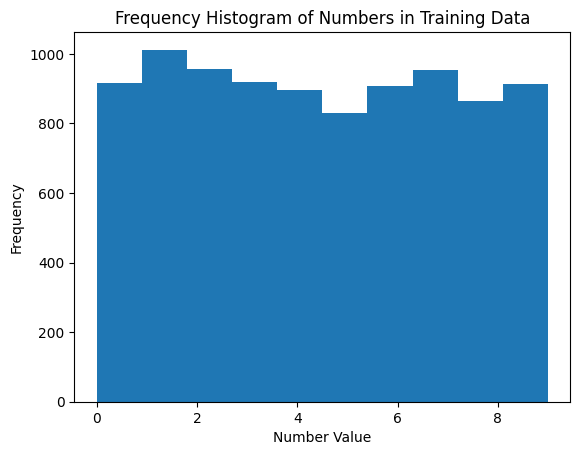

In [ ]:
import matplotlib.pyplot as plt
plt.hist(train["label"])
plt.title("Frequency Histogram of Numbers in Training Data")
plt.xlabel("Number Value")
plt.ylabel("Frequency")

* This graphic is used to visualize if there is an unequal sample size among the digits. The sample size for each digit appear to be comparable. There is no issue of unequal sampling.

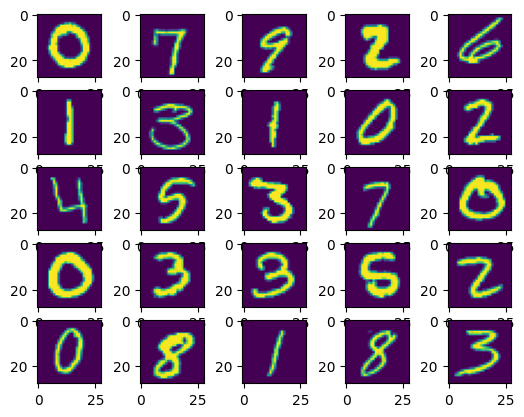

In [ ]:
import math
# plot the first 25 digits in the training set.
f, ax = plt.subplots(5, 5)
# plot some 4s as an example
for i in range(1,26):
    # Create a 1024x1024x3 array of 8 bit unsigned integers
    data = train.iloc[i,1:785].values # this is the first number
    nrows, ncols = 28, 28
    grid = data.reshape((nrows, ncols))
    n=math.ceil(i/5)-1
    m=[0,1,2,3,4]*5
    ax[m[i-1], n].imshow(grid)

* This graphic plots the first few digits in the training set to show how this pixel data is representing digits, and to also show how the handwriting varies. Not all digits are written the same. For example, there is a lot of variation in how people write 4s and 9s.

# PCA

In [ ]:
## normalize data ##
label_train=train['label']
train=train.drop('label', axis=1)

#normalize data
train = train / 255
#test = test / 255
train['label'] = label_train

In [ ]:
# Fill empty and NaNs values with NaN
train = train.fillna(np.nan)

# Check for Null values
train.isnull().sum().sort_values(ascending=False)

pixel645    1
pixel668    1
pixel677    1
pixel676    1
pixel675    1
           ..
pixel264    0
pixel265    0
pixel266    0
pixel267    0
label       0
Length: 785, dtype: int64

In [ ]:
for col in train.columns:
  train.fillna(train[col].median(), inplace = True)
#for col in test.columns:
#  test.fillna(test[col].median(), inplace = True)

In [ ]:
# Fill empty and NaNs values with NaN
train = train.fillna(np.nan)

# Check for Null values
train.isnull().sum().sort_values(ascending=False)

pixel0      0
pixel516    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel267    0
label       0
Length: 785, dtype: int64

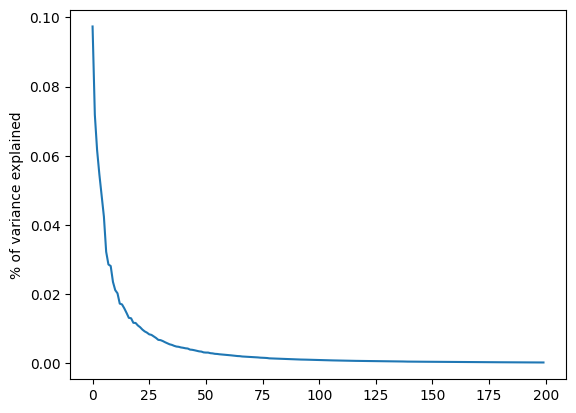

In [ ]:
from sklearn import decomposition
from sklearn import datasets

## PCA decomposition
pca = decomposition.PCA(n_components=200) #Finds first 200 PCs
pca.fit(train.drop('label', axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')
#plot reaches asymptote at around 50, which is optimal number of PCs to use.

## PCA decomposition with optimal number of PCs
#decompose train data
pca = decomposition.PCA(n_components=50) #use first 3 PCs (update to 100 later)
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']

#decompose test data
#pca.fit(test)
#PCtest = pd.DataFrame(pca.transform(test))

* This plot shows the separation of classes (digits) based on the first PCAs. Theoretically, these PCs should explain most of the variance in the data, enough to show separation in the groups of digits.

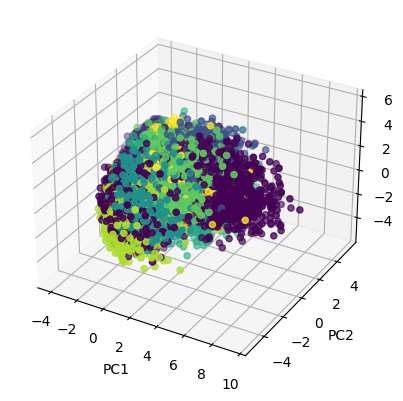

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

x =PCtrain[0]
y =PCtrain[1]
z =PCtrain[2]

colors = [int(i % 9) for i in PCtrain['label']]
ax.scatter(x, y, z, c=colors, marker='o', label=colors)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, learning_curve, StratifiedKFold
from sklearn.model_selection import train_test_split

In [ ]:
y = PCtrain['label']
X= PCtrain.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Cross validate model with Kfold stratified cross val
#kfold = StratifiedKFold(n_splits=5)

In [ ]:
# MLP tunning

mlp = MLPClassifier(max_iter=100)
mlp_param_grid = {'hidden_layer_sizes': [(50,50,50),(100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd','lbfgs'],
    'alpha': [1e-5, 1e-3],
    'learning_rate': ['constant','adaptive']
    }

gsMLP = GridSearchCV(mlp, mlp_param_grid, scoring="accuracy", n_jobs=6, verbose=1)
gsMLP.fit(X_train, y_train)

MLP_best = gsMLP.best_estimator_

# Best Score
gsMLP.best_score_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


0.9422103720352076

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3500,), random_state=1)
clf.fit(X_train, y_train)

In [ ]:
from sklearn import  metrics
#accuracy and confusion matrix
predicted = gsMLP.predict(X_test)
expected = y_test

print("Classification report for classifier %s:\n%s\n"
      % (gsMLP, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier GridSearchCV(estimator=MLPClassifier(max_iter=100), n_jobs=6,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [1e-05, 0.001],
                         'hidden_layer_sizes': [(50, 50, 50), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'lbfgs']},
             scoring='accuracy', verbose=1):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       284
           1       0.98      0.95      0.96       333
           2       0.94      0.94      0.94       339
           3       0.92      0.93      0.92       278
           4       0.94      0.97      0.96       290
           5       0.96      0.94      0.95       295
           6       0.97      0.97      0.97       307
           7       0.94      0.95      0.94       314
           8       0.94      0.91      0.92       288
           9   